In [12]:
import datetime
import pandas as pd
import numpy as np
import baostock as bs

import matplotlib.pyplot as plt
import matplotlib
from matplotlib.dates import date2num, DateFormatter
import mpl_finance as mpf
import pandas_datareader.data as web


In [13]:
bs.login()
rs = bs.query_history_k_data_plus('sh.600000',
            "date,code,open,high,low,close,preclose,volume,amount,adjustflag,turn,tradestatus,pctChg,isST",
            start_date='2019-1-1', end_date='2020-1-1',
            frequency='d', adjustflag='3')


login success!


In [14]:
rs

In [15]:
data_list = []
while (rs.error_code == '0') & rs.next():
    # 获取一条记录，将记录合并在一起
    data_list.append(rs.get_row_data())

result = pd.DataFrame(data_list, columns=rs.fields)

result.index = pd.DatetimeIndex(result['date'])
del result['date']

bs.logout()

result

logout success!


,code,open,high,low,close,preclose,volume,amount,adjustflag,turn,tradestatus,pctChg,isST
date,,,,,,,,,,,,,
2019-01-02,sh.600000,9.7400,9.7900,9.5800,9.7000,9.8000,23762822,229625669.0000,3,0.084554,1,-1.020412,0
2019-01-03,sh.600000,9.7000,9.8200,9.6600,9.8100,9.7000,18654262,181975985.0000,3,0.066376,1,1.134027,0
2019-01-04,sh.600000,9.7300,10.0000,9.7000,9.9600,9.8100,27172844,268964563.0000,3,0.096688,1,1.529048,0
2019-01-07,sh.600000,10.0900,10.0900,9.9200,9.9800,9.9600,23597376,235440197.0000,3,0.083965,1,0.200798,0
2019-01-08,sh.600000,10.0300,10.0300,9.9100,9.9600,9.9800,15104933,150501650.0000,3,0.053747,1,-0.200396,0
2019-01-09,sh.600000,10.0600,10.1600,9.9800,9.9900,9.9600,23163720,233890281.0000,3,0.082422,1,0.301202,0
2019-01-10,sh.600000,9.9400,10.0200,9.9200,9.9600,9.9900,15923566,158718755.0000,3,0.056660,1,-0.300298,0
2019-01-11,sh.600000,10.0300,10.1500,9.9600,10.0500,9.9600,19069069,191290102.0000,3,0.067852,1,0.903616,0
2019-01-14,sh.600000,10.0300,10.1000,10.0100,10.0600,10.0500,20352840,204659052.0000,3,0.072420,1,0.099505,0


In [24]:
new_result=result
new_result['open'] = pd.to_numeric(result['open'])
new_result['close'] =pd.to_numeric(result['close'])
new_result['high'] = pd.to_numeric(result['high'])
new_result['low'] = pd.to_numeric(result['low'])
result.info()
new_result.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 244 entries, 2019-01-02 to 2019-12-31
Data columns (total 13 columns):
code           244 non-null object
open           244 non-null float64
high           244 non-null float64
low            244 non-null float64
close          244 non-null float64
preclose       244 non-null object
volume         244 non-null object
amount         244 non-null object
adjustflag     244 non-null object
turn           244 non-null object
tradestatus    244 non-null object
pctChg         244 non-null object
isST           244 non-null object
dtypes: float64(4), object(9)
memory usage: 26.7+ KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 244 entries, 2019-01-02 to 2019-12-31
Data columns (total 13 columns):
code           244 non-null object
open           244 non-null float64
high           244 non-null float64
low            244 non-null float64
close          244 non-null float64
preclose       244 non-null object
volume         244 non-nul

In [16]:
df_stockload = web.DataReader("600000.SS", "yahoo", datetime.datetime(2019,1,1), datetime.datetime(2020,1,1))

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,9.79,9.58,9.74,9.70,23762822.0,8.921819
2019-01-03,9.82,9.66,9.70,9.81,18654262.0,9.022994
2019-01-04,10.00,9.73,9.73,9.96,27172844.0,9.160960
2019-01-07,10.02,9.92,9.73,9.98,23597376.0,9.179356
2019-01-08,10.03,9.91,10.03,9.96,15104933.0,9.160960
2019-01-09,10.16,9.98,10.06,9.99,23163720.0,9.188553
2019-01-10,10.02,9.92,9.94,9.96,15923566.0,9.160960
2019-01-11,10.15,9.96,10.03,10.05,19069069.0,9.243740
2019-01-14,10.10,10.01,10.03,10.06,20352840.0,9.252937


In [23]:
df_stockload.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 242 entries, 2019-01-02 to 2019-12-31
Data columns (total 6 columns):
High         242 non-null float64
Low          242 non-null float64
Open         242 non-null float64
Close        242 non-null float64
Volume       242 non-null float64
Adj Close    242 non-null float64
dtypes: float64(6)
memory usage: 13.2 KB


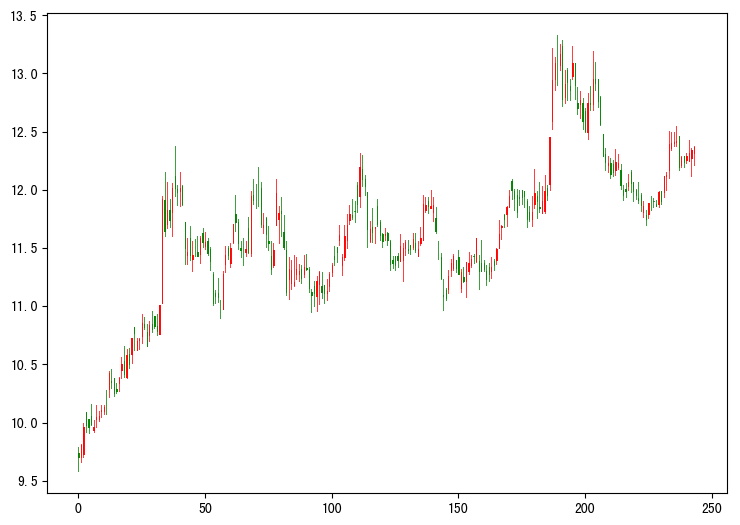

In [25]:
ma_list = [5, 20, 60]

# 创建fig对象
fig = plt.figure(figsize=(8,6), dpi=100, facecolor='white')
# 调整边框距离
fig.subplots_adjust(left=0.09, bottom=0.10, right=0.94,top=0.9, wspace=0.2, hspace=0)

# 创建k线图
graph_bar = fig.add_subplot(1,1,1)
mpf.candlestick2_ochl(graph_bar, result['open'], result['close'], result['high'], result['low'], width=0.1, colorup='r', colordown='g')

# mpf.candlestick2_ochl(graph_bar, df_stockload['Open'], df_stockload['Close'], df_stockload['High'], df_stockload['Low'], width=0.5, colorup='r', colordown='g')  # 绘制K线走势


plt.show()

In [26]:
result

,code,open,high,low,close,preclose,volume,amount,adjustflag,turn,tradestatus,pctChg,isST
date,,,,,,,,,,,,,
2019-01-02,sh.600000,9.74,9.79,9.58,9.70,9.8000,23762822,229625669.0000,3,0.084554,1,-1.020412,0
2019-01-03,sh.600000,9.70,9.82,9.66,9.81,9.7000,18654262,181975985.0000,3,0.066376,1,1.134027,0
2019-01-04,sh.600000,9.73,10.00,9.70,9.96,9.8100,27172844,268964563.0000,3,0.096688,1,1.529048,0
2019-01-07,sh.600000,10.09,10.09,9.92,9.98,9.9600,23597376,235440197.0000,3,0.083965,1,0.200798,0
2019-01-08,sh.600000,10.03,10.03,9.91,9.96,9.9800,15104933,150501650.0000,3,0.053747,1,-0.200396,0
2019-01-09,sh.600000,10.06,10.16,9.98,9.99,9.9600,23163720,233890281.0000,3,0.082422,1,0.301202,0
2019-01-10,sh.600000,9.94,10.02,9.92,9.96,9.9900,15923566,158718755.0000,3,0.056660,1,-0.300298,0
2019-01-11,sh.600000,10.03,10.15,9.96,10.05,9.9600,19069069,191290102.0000,3,0.067852,1,0.903616,0
2019-01-14,sh.600000,10.03,10.10,10.01,10.06,10.0500,20352840,204659052.0000,3,0.072420,1,0.099505,0


In [27]:
result.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 244 entries, 2019-01-02 to 2019-12-31
Data columns (total 13 columns):
code           244 non-null object
open           244 non-null float64
high           244 non-null float64
low            244 non-null float64
close          244 non-null float64
preclose       244 non-null object
volume         244 non-null object
amount         244 non-null object
adjustflag     244 non-null object
turn           244 non-null object
tradestatus    244 non-null object
pctChg         244 non-null object
isST           244 non-null object
dtypes: float64(4), object(9)
memory usage: 26.7+ KB


In [28]:
result.keys()

Index(['code', 'open', 'high', 'low', 'close', 'preclose', 'volume', 'amount',
       'adjustflag', 'turn', 'tradestatus', 'pctChg', 'isST'],
      dtype='object')